In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import yfinance as yf

btc = yf.download("BTC-USD",start='2024-04-10',end='2024-04-11', interval='1m')


ltc = yf.download("LTC-USD",start='2024-04-10',end='2024-04-11',interval='1m')

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [4]:
btc.shape

(1411, 6)

In [5]:
ltc.shape

(1411, 6)

In [6]:
btc

,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2024-04-10 00:00:00+00:00,69137.804688,69137.804688,69137.804688,69137.804688,69137.804688,0
2024-04-10 00:01:00+00:00,69112.531250,69112.531250,69112.531250,69112.531250,69112.531250,4349952
2024-04-10 00:02:00+00:00,69093.843750,69093.843750,69093.843750,69093.843750,69093.843750,0
2024-04-10 00:03:00+00:00,69095.515625,69095.515625,69095.515625,69095.515625,69095.515625,0
2024-04-10 00:04:00+00:00,69094.117188,69094.117188,69094.117188,69094.117188,69094.117188,3362816
...,...,...,...,...,...,...
2024-04-10 23:53:00+00:00,70522.093750,70522.093750,70522.093750,70522.093750,70522.093750,0
2024-04-10 23:54:00+00:00,70514.281250,70514.281250,70514.281250,70514.281250,70514.281250,1617920
2024-04-10 23:56:00+00:00,70540.414062,70540.414062,70540.414062,70540.414062,70540.414062,0


In [7]:
ltc

,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2024-04-10 00:00:00+00:00,97.499809,97.499809,97.499809,97.499809,97.499809,0
2024-04-10 00:01:00+00:00,97.525772,97.525772,97.525772,97.525772,97.525772,58688
2024-04-10 00:02:00+00:00,97.517197,97.517197,97.517197,97.517197,97.517197,0
2024-04-10 00:03:00+00:00,97.494255,97.494255,97.494255,97.494255,97.494255,0
2024-04-10 00:04:00+00:00,97.448853,97.448853,97.448853,97.448853,97.448853,0
...,...,...,...,...,...,...
2024-04-10 23:53:00+00:00,96.651001,96.651001,96.651001,96.651001,96.651001,1740032
2024-04-10 23:54:00+00:00,96.658691,96.658691,96.658691,96.658691,96.658691,46784
2024-04-10 23:56:00+00:00,96.670815,96.670815,96.670815,96.670815,96.670815,91072


In [8]:
p1 = btc['Adj Close']
p2 = ltc['Adj Close']

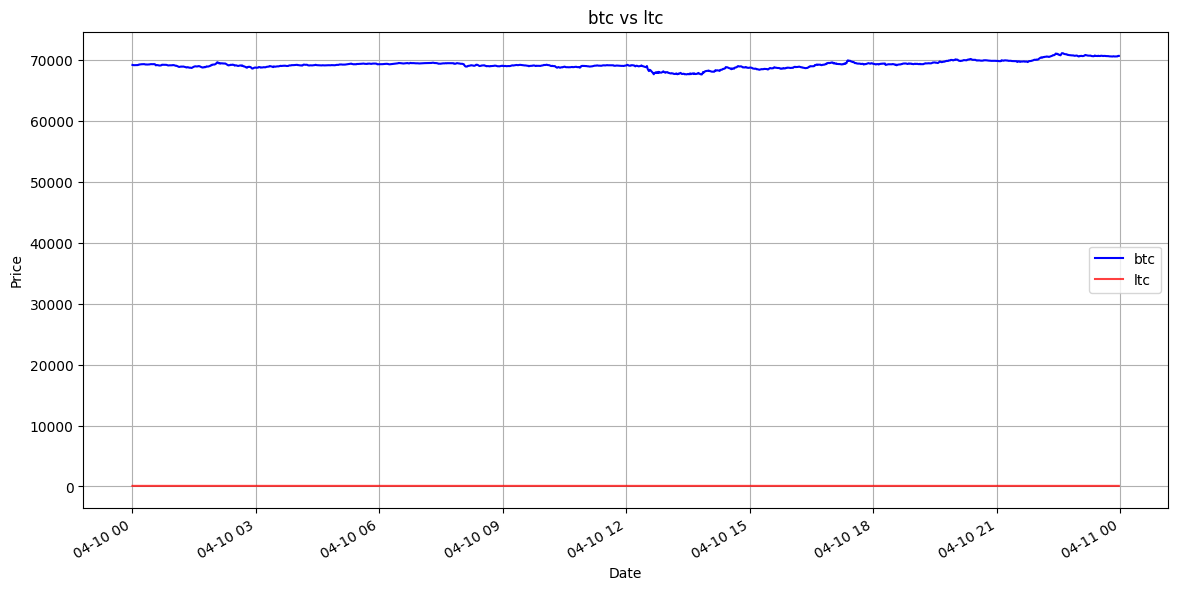

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))
p1.plot(label='btc', color='blue')
p2.plot(label='ltc', color='red', alpha=0.75)
plt.title('btc vs ltc')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

In [10]:
from statsmodels.tsa.stattools import coint

# Test for cointegration
score, p_value, _ = coint(p1,p2)
print(f'Engle-Granger cointegration test p-value: {p_value}')

Engle-Granger cointegration test p-value: 0.9863752993443312


In [11]:
S1_0 = btc['Open'][0]
S2_0 = ltc['Open'][0]
r1=np.log(btc['Adj Close']/btc['Adj Close'].shift(1))
r2=np.log(ltc['Adj Close']/ltc['Adj Close'].shift(1))

In [12]:
mu_1 = r1.mean()*390
mu_2 = r2.mean()*390
sigma_1 = r1.std()*np.sqrt(390)
sigma_2 = r2.std()*np.sqrt(390)
z_0 = 0
print(f'mu_1: {mu_1}')
print(f'mu_2: {mu_2}')
print(f'sigma_1: {sigma_1}')
print(f'sigma_2: {sigma_2}')

mu_1: 0.005854461136301094
mu_2: -0.002271961048731164
sigma_1: 0.014340163051219478
sigma_2: 0.012703685212954546


In [13]:
from scipy.stats import linregress
result=linregress(np.log(btc['Adj Close']),np.log(ltc['Adj Close']))
beta=result.slope
print(f'beta: {beta}')

beta: 0.42546588593177515


In [14]:
gamma = 0.5
delta=1
rho=r1.corr(r2)
T=1
M=len(btc['Adj Close'])
print(f'rho: {rho}')

rho: 0.2453923254594598


In [15]:
dt = T/M
S1 = np.zeros((M + 1, 1))
S2 = np.zeros((M + 1, 1))
z =  np.zeros((M + 1, 1))
a =  np.zeros((M + 1, 1))
b =  np.zeros((M + 1, 1))
c =  np.zeros((M + 1, 1))
Pi_1 = np.zeros((M + 1, 1))
Pi_2 = np.zeros((M + 1, 1))
tt = np.linspace(0, 1, M + 1)
z[0] = z_0
S1[0] = S1_0
S2[0] = S2_0
sigma_beta = np.sqrt(sigma_1 ** 2 + beta ** 2 * sigma_2 ** 2 + 2 * beta * sigma_1 * sigma_2 * rho)
eta = (-1/delta) * (mu_1 - sigma_1 ** 2/2 + beta*(mu_2 - sigma_2 ** 2/2))
rn = np.random.standard_normal(z.shape)
rn1 = np.random.standard_normal(S1.shape) 
rn2 = np.random.standard_normal(S2.shape) 
for t in range(1, M + 1):
    z[t] = z[t-1]* (1 - delta * (eta - z[t-1])) * dt + sigma_beta * np.sqrt(dt)*((sigma_1 + beta * sigma_2 * rho)/ sigma_beta * rn1[t] + beta * (sigma_2 * np.sqrt(1-rho ** 2)/sigma_beta) * rn1[t]);
    S1[t] = S1[t-1] * np.exp((mu_1 + delta * z[t] - sigma_1 ** 2 / 2) * dt + sigma_1 * np.sqrt(dt) * rn1[t])
    S2[t] = S2[t-1] * np.exp((mu_2 - sigma_2 ** 2 / 2) * dt + sigma_2 * np.sqrt(dt) * (rho * rn1[t] + np.sqrt(1 - rho ** 2) * rn2[t]))

Text(0.5, 1.0, 'z')

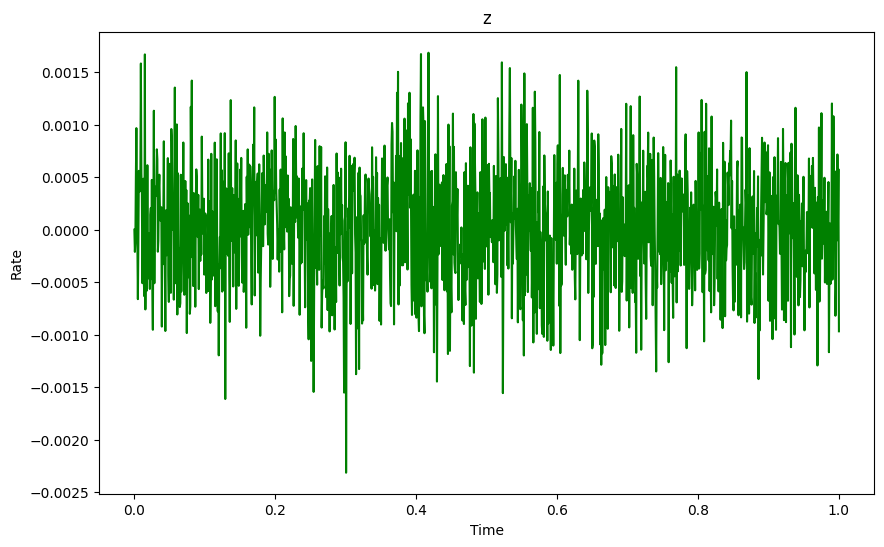

In [16]:
plt.figure(figsize=(10, 6))
plt.plot(tt, z, 'g', lw=1.5)
plt.xlabel('Time')
plt.ylabel('Rate')
plt.title('z')

In [17]:
for t in range(1, M + 1):
    a[t] = 0.5 * (T - t * dt)/((1-rho ** 2) * sigma_1 ** 2)
    b[t] = - 0.25 * (T - t * dt) ** 2 * (sigma_1 ** 2 + beta * sigma_2 ** 2)/((1 - rho ** 2) * sigma_1 ** 2) - rho * mu_2 * (T - t * dt)/((1 - rho **2) * sigma_1 * sigma_2)
    c[t] = 0.5 * mu_2 ** 2 * (T - t * dt)/((1 - rho ** 2) * sigma_2 ** 2) + 0.25 * (T - t * dt) ** 2 * (sigma_1 ** 2 + beta * sigma_2 ** 2 + 2 * sigma_1 * sigma_2 * beta *rho) * delta ** 2/((1 - rho ** 2) * sigma_1 ** 2) + 0.25 * (T - t * dt) ** 2 * mu_2 * delta * rho * (sigma_1 ** 2 + beta * sigma_2 ** 2) + 1/24 * (T - t * dt) ** 3 * (sigma_1 ** 2 + beta * sigma_2 ** 2) ** 2 * delta ** 2/((1 - rho ** 2) * sigma_1 ** 2)
    Pi_1[t] = (1 / S1[t]) * ((mu_1 + delta * z[t])/(gamma * (1 - rho ** 2) * sigma_1 ** 2) + delta/gamma * (-2 * a[t] * (mu_1 + delta * z[t])-b[t]) - rho * mu_2/(gamma * (1 - rho ** 2) * sigma_1 * sigma_2))
    Pi_2[t] = (1 / S2[t]) * (mu_2 / (gamma * (1 - rho ** 2) * sigma_2 ** 2) + delta * beta / gamma * (- 2 * a[t] * (mu_1 + delta * z[t]) - b[t]) - rho * (mu_1 + delta * z[t]) / (gamma * (1 - rho ** 2) * sigma_1 * sigma_2))
print(f'Pi_1: {Pi_1[t]}')
print(f'Pi_2: {Pi_2[t]}')
print(f'a[t]: {a[t]}')
print(f'b[t]: {b[t]}')
print(f'c[t]: {c[t]}')

Pi_1: [0.00081195]
Pi_2: [-0.454096]
a[t]: [0.]
b[t]: [0.]
c[t]: [0.]


Text(0.5, 1.0, 'Weights')

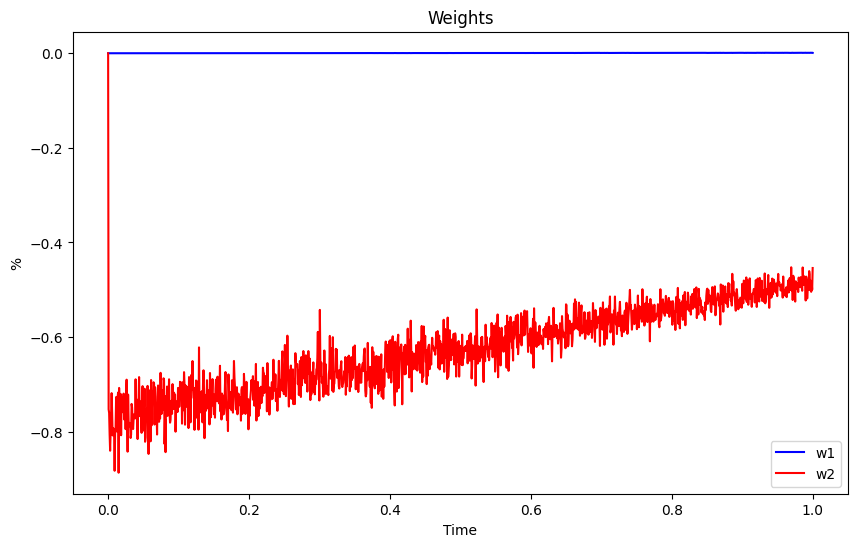

In [18]:
plt.figure(figsize=(10, 6))
plt.plot(tt, Pi_1, 'b', lw=1.5, label='w1')
plt.plot(tt, Pi_2, 'r', lw=1.5, label='w2')
plt.legend(loc=0)
plt.xlabel('Time')
plt.ylabel('%')
plt.title('Weights')

Text(0.5, 1.0, 'Cash')

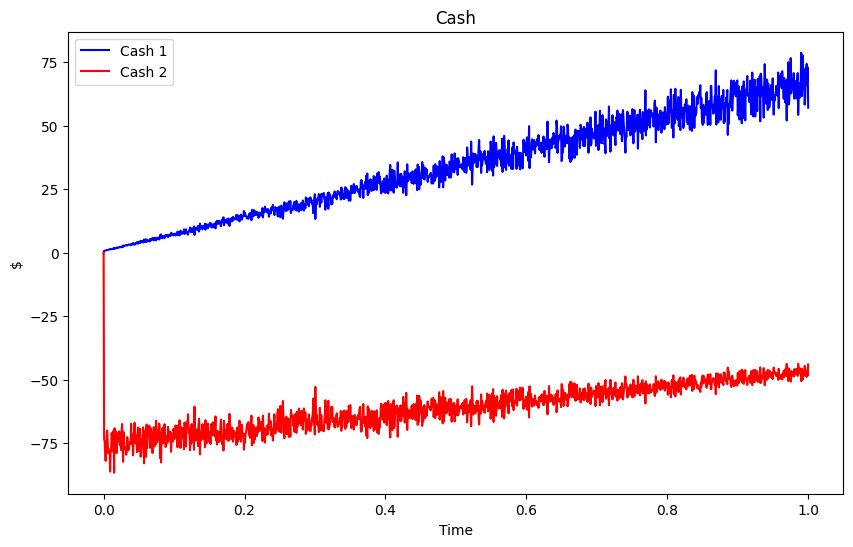

In [19]:
plt.figure(figsize=(10, 6))
plt.plot(tt, Pi_1 * S1, 'b', lw=1.5, label='Cash 1')
plt.plot(tt, Pi_2 * S2, 'r', lw=1.5, label='Cash 2')
plt.legend(loc=0)
plt.xlabel('Time')
plt.ylabel('$')
plt.title('Cash')

Text(0.5, 1.0, 'Comparison')

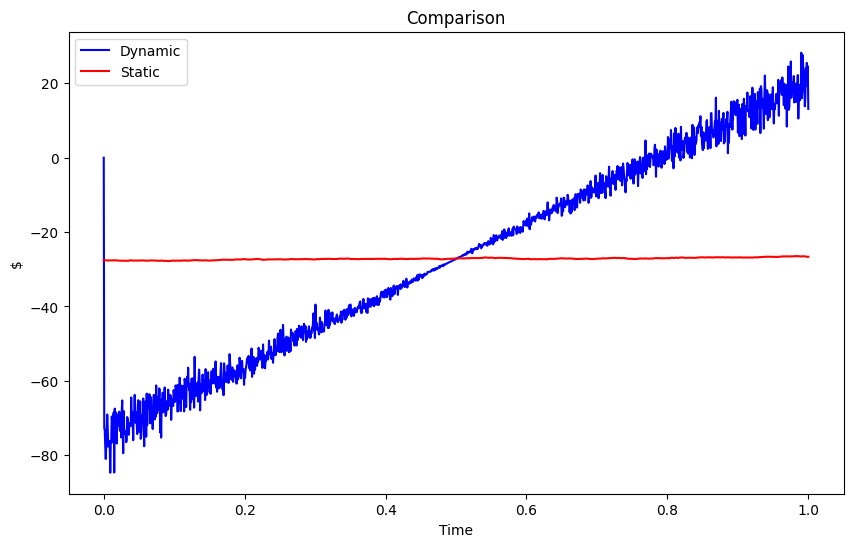

In [20]:
plt.figure(figsize=(10, 6))
plt.plot(tt, Pi_1 * S1 + Pi_2 * S2, 'b', lw=1.5, label='Dynamic')
plt.plot(tt, Pi_1.mean() * S1 + Pi_2.mean() * S2, 'r', lw=1.5, label='Static')
plt.legend(loc=0)
plt.xlabel('Time')
plt.ylabel('$')
plt.title('Comparison')

In [21]:
import yfinance as yf

tsco = yf.download("TSCO.L",start='2024-04-02',end='2024-04-03', interval='1m')


sbry = yf.download("SBRY.L",start='2024-04-02',end='2024-04-03',interval='1m')

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [23]:
tsco.shape

(354, 6)

In [24]:
sbry.shape

(354, 6)

In [25]:
tsco

,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2024-04-02 08:00:00+01:00,296.799988,297.216614,295.770996,296.160004,296.160004,0
2024-04-02 08:01:00+01:00,296.246002,297.031006,296.000000,296.799988,296.799988,60410
2024-04-02 08:03:00+01:00,296.799988,297.200012,296.399994,297.200012,297.200012,28593
2024-04-02 08:04:00+01:00,296.399994,297.798706,296.399994,297.798706,297.798706,7846
2024-04-02 08:05:00+01:00,296.399994,297.500000,296.399994,297.219086,297.219086,9189
...,...,...,...,...,...,...
2024-04-02 16:25:00+01:00,294.899994,294.899994,294.700012,294.799988,294.799988,54562
2024-04-02 16:26:00+01:00,294.700012,294.700012,294.700012,294.700012,294.700012,7766
2024-04-02 16:27:00+01:00,294.700012,294.799988,294.700012,294.700012,294.700012,37693


In [26]:
sbry

,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2024-04-02 08:00:00+01:00,269.799988,270.600006,269.691010,270.306000,270.306000,0
2024-04-02 08:01:00+01:00,269.600006,269.799988,269.105988,269.105988,269.105988,9092
2024-04-02 08:03:00+01:00,268.799988,268.799988,268.608002,268.608002,268.608002,9264
2024-04-02 08:04:00+01:00,269.000000,269.596497,269.000000,269.596497,269.596497,469
2024-04-02 08:05:00+01:00,270.200012,270.200012,268.795990,270.200012,270.200012,32154
...,...,...,...,...,...,...
2024-04-02 16:25:00+01:00,268.200012,268.399994,268.200012,268.399994,268.399994,20441
2024-04-02 16:26:00+01:00,268.200012,268.200012,268.200012,268.200012,268.200012,18317
2024-04-02 16:27:00+01:00,268.200012,268.200012,268.200012,268.200012,268.200012,1106


In [27]:
p1 = tsco['Adj Close']
p2 = sbry['Adj Close']

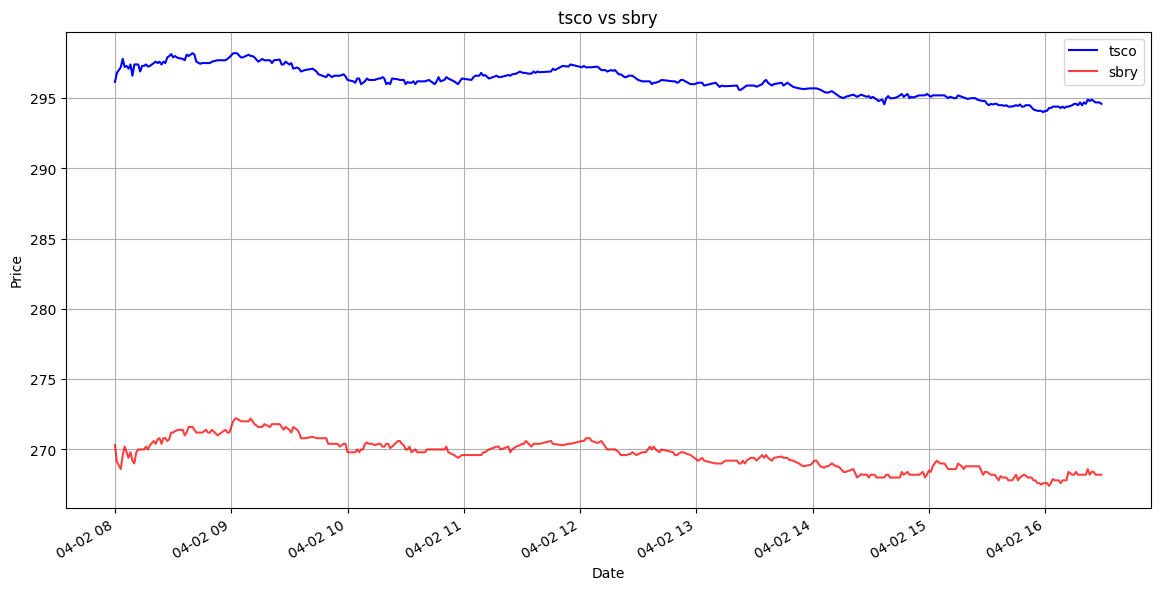

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))
p1.plot(label='tsco', color='blue')
p2.plot(label='sbry', color='red', alpha=0.75)
plt.title('tsco vs sbry')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

In [29]:
from statsmodels.tsa.stattools import coint

# Test for cointegration
score, p_value, _ = coint(p1,p2)
print(f'Engle-Granger cointegration test p-value: {p_value}')

Engle-Granger cointegration test p-value: 0.03566813031982654


In [30]:
S1_0 = tsco['Open'][0]
S2_0 = sbry['Open'][0]
r1=np.log(tsco['Adj Close']/tsco['Adj Close'].shift(1))
r2=np.log(sbry['Adj Close']/sbry['Adj Close'].shift(1))

In [31]:
mu_1 = r1.mean()*390
mu_2 = r2.mean()*390
sigma_1 = r1.std()*np.sqrt(390)
sigma_2 = r2.std()*np.sqrt(390)
z_0 = 0
print(f'mu_1: {mu_1}')
print(f'mu_2: {mu_2}')
print(f'sigma_1: {sigma_1}')
print(f'sigma_2: {sigma_2}')

mu_1: -0.005834904286559667
mu_2: -0.008641464584305762
sigma_1: 0.011309373614740091
sigma_2: 0.01642345509632963


In [32]:
from scipy.stats import linregress
result=linregress(np.log(tsco['Adj Close']),np.log(sbry['Adj Close']))
beta=result.slope
print(f'beta: {beta}')

beta: 1.0877359054190008


In [33]:
gamma = 0.5
delta=-1
rho=r1.corr(r2)
T=1
M=len(tsco['Adj Close'])
print(f'rho: {rho}')

rho: 0.1938619184664345


In [34]:
dt = T/M
S1 = np.zeros((M + 1, 1))
S2 = np.zeros((M + 1, 1))
z =  np.zeros((M + 1, 1))
a =  np.zeros((M + 1, 1))
b =  np.zeros((M + 1, 1))
c =  np.zeros((M + 1, 1))
Pi_1 = np.zeros((M + 1, 1))
Pi_2 = np.zeros((M + 1, 1))
tt = np.linspace(0, 1, M + 1)
z[0] = z_0
S1[0] = S1_0
S2[0] = S2_0
sigma_beta = np.sqrt(sigma_1 ** 2 + beta ** 2 * sigma_2 ** 2 + 2 * beta * sigma_1 * sigma_2 * rho)
eta = (-1/delta) * (mu_1 - sigma_1 ** 2/2 + beta*(mu_2 - sigma_2 ** 2/2))
rn = np.random.standard_normal(z.shape)
rn1 = np.random.standard_normal(S1.shape) 
rn2 = np.random.standard_normal(S2.shape) 
for t in range(1, M + 1):
    z[t] = z[t-1]* (1 - delta * (eta - z[t-1])) * dt + sigma_beta * np.sqrt(dt)*((sigma_1 + beta * sigma_2 * rho)/ sigma_beta * rn1[t] + beta * (sigma_2 * np.sqrt(1-rho ** 2)/sigma_beta) * rn1[t]);
    S1[t] = S1[t-1] * np.exp((mu_1 + delta * z[t] - sigma_1 ** 2 / 2) * dt + sigma_1 * np.sqrt(dt) * rn1[t])
    S2[t] = S2[t-1] * np.exp((mu_2 - sigma_2 ** 2 / 2) * dt + sigma_2 * np.sqrt(dt) * (rho * rn1[t] + np.sqrt(1 - rho ** 2) * rn2[t]))

Text(0.5, 1.0, 'z')

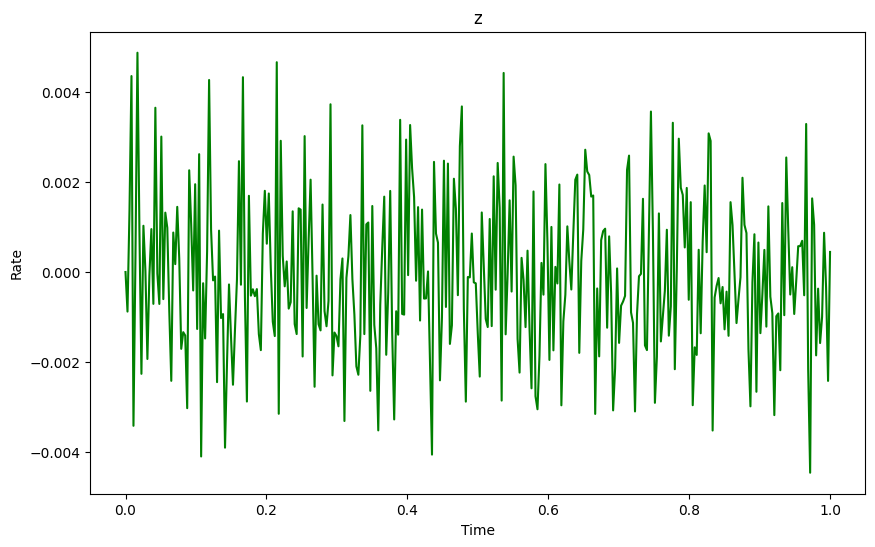

In [35]:
plt.figure(figsize=(10, 6))
plt.plot(tt, z, 'g', lw=1.5)
plt.xlabel('Time')
plt.ylabel('Rate')
plt.title('z')

In [36]:
for t in range(1, M + 1):
    a[t] = 0.5 * (T - t * dt)/((1-rho ** 2) * sigma_1 ** 2)
    b[t] = - 0.25 * (T - t * dt) ** 2 * (sigma_1 ** 2 + beta * sigma_2 ** 2)/((1 - rho ** 2) * sigma_1 ** 2) - rho * mu_2 * (T - t * dt)/((1 - rho **2) * sigma_1 * sigma_2)
    c[t] = 0.5 * mu_2 ** 2 * (T - t * dt)/((1 - rho ** 2) * sigma_2 ** 2) + 0.25 * (T - t * dt) ** 2 * (sigma_1 ** 2 + beta * sigma_2 ** 2 + 2 * sigma_1 * sigma_2 * beta *rho) * delta ** 2/((1 - rho ** 2) * sigma_1 ** 2) + 0.25 * (T - t * dt) ** 2 * mu_2 * delta * rho * (sigma_1 ** 2 + beta * sigma_2 ** 2) + 1/24 * (T - t * dt) ** 3 * (sigma_1 ** 2 + beta * sigma_2 ** 2) ** 2 * delta ** 2/((1 - rho ** 2) * sigma_1 ** 2)
    Pi_1[t] = (1 / S1[t]) * ((mu_1 + delta * z[t])/(gamma * (1 - rho ** 2) * sigma_1 ** 2) + delta/gamma * (-2 * a[t] * (mu_1 + delta * z[t])-b[t]) - rho * mu_2/(gamma * (1 - rho ** 2) * sigma_1 * sigma_2))
    Pi_2[t] = (1 / S2[t]) * (mu_2 / (gamma * (1 - rho ** 2) * sigma_2 ** 2) + delta * beta / gamma * (- 2 * a[t] * (mu_1 + delta * z[t]) - b[t]) - rho * (mu_1 + delta * z[t]) / (gamma * (1 - rho ** 2) * sigma_1 * sigma_2))
    
print(f'Pi_1: {Pi_1[t]}')
print(f'Pi_2: {Pi_2[t]}')
print(f'a[t]: {a[t]}')
print(f'b[t]: {b[t]}')
print(f'c[t]: {c[t]}')

Pi_1: [-0.28528289]
Pi_2: [-0.19367464]
a[t]: [0.]
b[t]: [0.]
c[t]: [0.]


Text(0.5, 1.0, 'Weights')

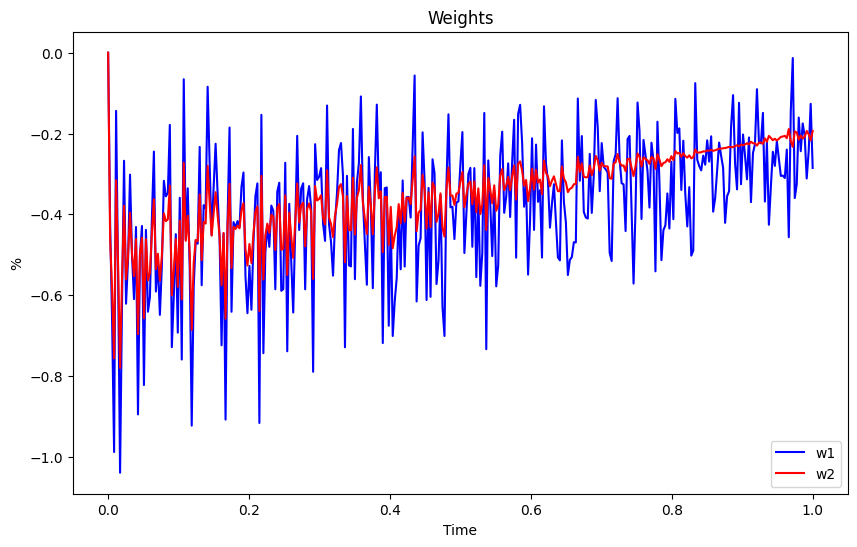

In [37]:
plt.figure(figsize=(10, 6))
plt.plot(tt, Pi_1, 'b', lw=1.5, label='w1')
plt.plot(tt, Pi_2, 'r', lw=1.5, label='w2')
plt.legend(loc=0)
plt.xlabel('Time')
plt.ylabel('%')
plt.title('Weights')

Text(0.5, 1.0, 'Cash')

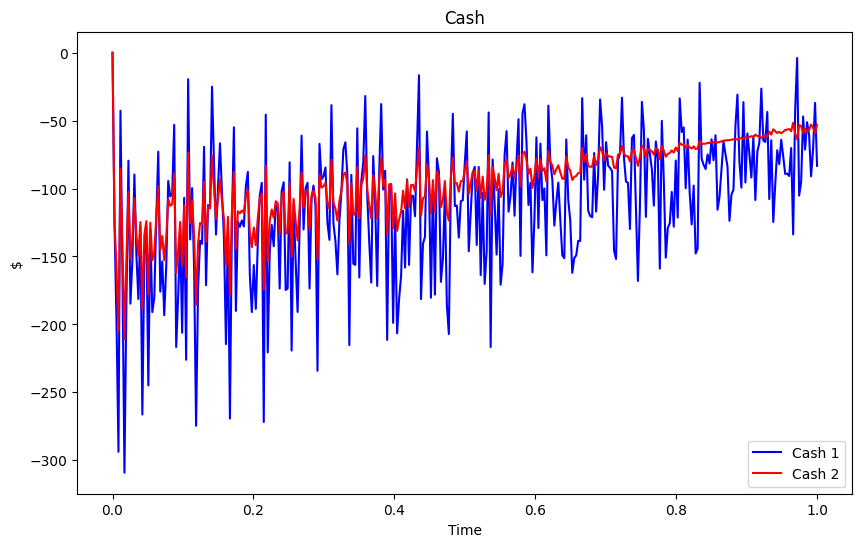

In [38]:
plt.figure(figsize=(10, 6))
plt.plot(tt, Pi_1 * S1, 'b', lw=1.5, label='Cash 1')
plt.plot(tt, Pi_2 * S2, 'r', lw=1.5, label='Cash 2')
plt.legend(loc=0)
plt.xlabel('Time')
plt.ylabel('$')
plt.title('Cash')

Text(0.5, 1.0, 'Comparison')

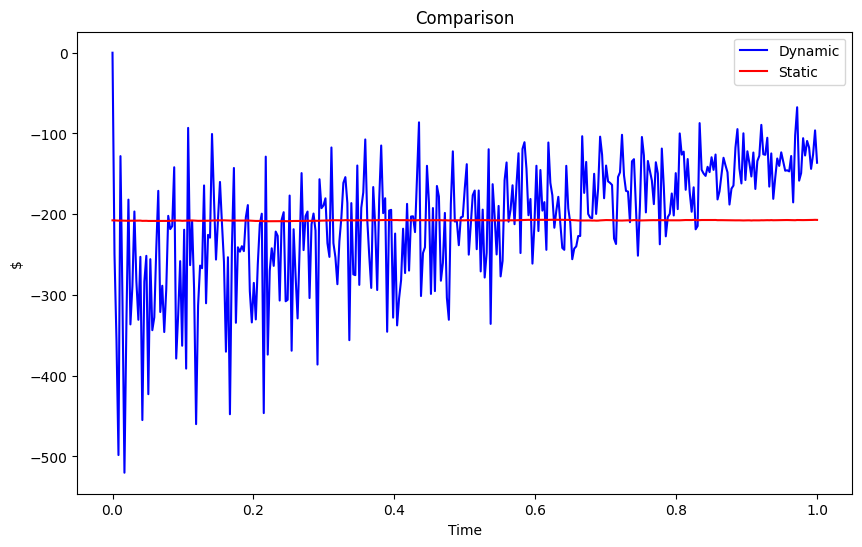

In [39]:
plt.figure(figsize=(10, 6))
plt.plot(tt, Pi_1 * S1 + Pi_2 * S2, 'b', lw=1.5, label='Dynamic')
plt.plot(tt, Pi_1.mean() * S1 + Pi_2.mean() * S2, 'r', lw=1.5, label='Static')
plt.legend(loc=0)
plt.xlabel('Time')
plt.ylabel('$')
plt.title('Comparison')